#### Columns:

#### pH: The pH level of the water.
#### Hardness: Water hardness, a measure of mineral content.
#### Solids: Total dissolved solids in the water.
#### Chloramines: Chloramines concentration in the water.
#### Sulfate: Sulfate concentration in the water.
#### Conductivity: Electrical conductivity of the water.
#### Organic_carbon: Organic carbon content in the water.
#### Trihalomethanes: Trihalomethanes concentration in the water.
#### Turbidity: Turbidity level, a measure of water clarity.
#### Potability: Target variable; indicates water potability with values 1 (potable) and 0 (not potable).


#### Data Usage: This dataset is valuable for water quality assessment, water treatment planning, and ensuring the safety of drinking water supplies. It can be utilized by water treatment plants, environmental agencies, and researchers to make data-driven decisions regarding water quality and potability.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,train_test_split
from imblearn.over_sampling import RandomOverSampler,SMOTE

In [2]:
df = pd.read_csv('./water_potability(classification).csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
df.shape

(3276, 10)

In [6]:
df.size

32760

In [7]:
df.duplicated().sum()

0

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(2011, 10)

In [10]:
df.drop_duplicates()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [11]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [12]:
sc = StandardScaler()

In [13]:
x = sc.fit_transform(x)

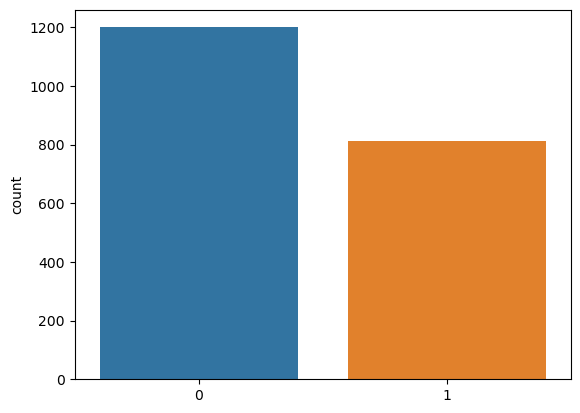

In [14]:
sns.countplot(x=y)
plt.show()

In [15]:
x_smote,y_smote = SMOTE().fit_resample(x,y)

In [16]:
models ={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "KNeighborsClassifier":KNeighborsClassifier()
}

In [17]:
for name,model in models.items():
    scores = cross_val_score(model,x_smote,y_smote,scoring="accuracy",cv=10,n_jobs=-1)
    print("Cross validation model :{}".format(name))
    print("Mean score: ",np.mean(scores)*100)
    print("*"*100)

Cross validation model :LogisticRegression
Mean score:  49.91666666666667
****************************************************************************************************
Cross validation model :DecisionTreeClassifier
Mean score:  63.583333333333336
****************************************************************************************************
Cross validation model :RandomForestClassifier
Mean score:  72.16666666666669
****************************************************************************************************
Cross validation model :AdaBoostClassifier
Mean score:  55.125000000000014
****************************************************************************************************
Cross validation model :GradientBoostingClassifier
Mean score:  62.41666666666668
****************************************************************************************************
Cross validation model :KNeighborsClassifier
Mean score:  65.83333333333333
*******************************

### RandomForestClassifier

In [18]:
rf = RandomForestClassifier()

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,random_state=42,shuffle=True,test_size=0.2)

In [20]:
model = RandomForestClassifier()

In [21]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [22]:
print("Model trained with GradientBoostingClassifier")
train_score = accuracy_score(y_train,model.predict(x_train))
test_score = accuracy_score(y_test,model.predict(x_test))
train_conf = confusion_matrix(y_train,model.predict(x_train))
test_conf = confusion_matrix(y_test,model.predict(x_test))
print("Model accuracy on train is:",train_score)
print("Model accuracy on test is :",test_score)
print("confusion_matrix train is:",train_conf)
print("Confusion_matrix test is",test_conf)
print("wrong predictions made:",((y_test !=model.predict(x_test)).sum(),"/",
                                 ((y_test == model.predict(x_test)).sum()+
                                  (y_test != model.predict(x_test)).sum())))

Model trained with GradientBoostingClassifier
Model accuracy on train is: 1.0
Model accuracy on test is : 0.6958333333333333
confusion_matrix train is: [[974   0]
 [  0 946]]
Confusion_matrix test is [[159  67]
 [ 79 175]]
wrong predictions made: (146, '/', 480)


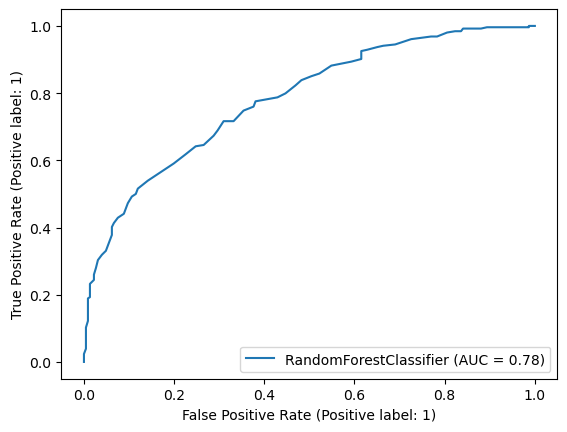

In [23]:
roc_display = RocCurveDisplay.from_estimator(model,x_test,y_test)